In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import tensorflow as tf

import pandas as pd

#==============================================================================
# NumPy is the fundamental package for scientific  computing with Python
#● SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics,
#science, and engineering.


#Data Munging or Data Wrangling means taking data
#that's stored in one format and changing it into another
#format.
#==============================================================================
import numpy as np

import random as rnd

# visualization
import seaborn as sns
#MUatplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats
#and interactive environments across platforms.
import matplotlib.pyplot as plt
# machine learning
#print(os.listdir("../input")

# Any results you write to the current directory are saved as output.

In [43]:
train_df = pd.read_csv('dataset.csv')


In [3]:

print(train_df.columns.values)

['Date' 'Temperature' 'Humidity' 'Pressure' 'PM10' 'PM2point5']


In [4]:
train_df=train_df.drop("Date", axis=1)

In [5]:
print(train_df.columns.values)

['Temperature' 'Humidity' 'Pressure' 'PM10' 'PM2point5']


In [6]:
train_df.shape

(181100, 5)

In [7]:
train_df.head()

,Temperature,Humidity,Pressure,PM10,PM2point5
0,79.705149,29.763173,971.557684,0.0,3.8
1,79.611960,29.644341,971.594328,5.0,3.8
2,79.602869,29.584354,971.582935,4.6,3.8
3,79.600596,29.668567,971.561229,5.7,3.8
4,79.589232,29.668746,971.584034,5.5,3.7


In [8]:
train_df.tail()


,Temperature,Humidity,Pressure,PM10,PM2point5
181095,80.344967,22.759954,974.853771,0.0,0.7
181096,80.325647,22.953003,974.836615,0.0,0.7
181097,80.329056,23.199669,974.852971,0.0,0.7
181098,80.333602,23.350020,974.850408,0.0,0.7
181099,80.331329,23.434334,974.848224,0.0,0.7


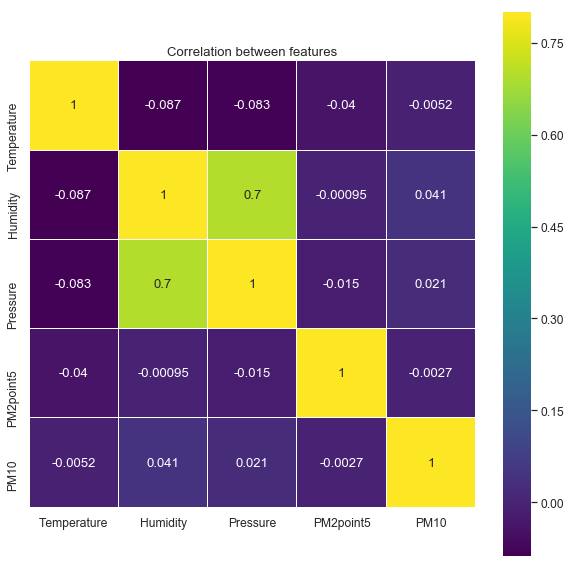

In [9]:
corr=train_df.corr()["Temperature"]
corr[np.argsort(corr, axis=0)[::-1]]

 


#correlation between features
#correlation between feature
corrMatrix=train_df[["Temperature","Humidity","Pressure","PM2point5",
                  "PM10"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');


In [10]:
pd.isnull(train_df.Temperature).sum()


0

In [11]:
pd.isnull(train_df.Humidity).sum()


0

In [12]:
pd.isnull(train_df.Pressure).sum()


0

In [13]:
pd.isnull(train_df.PM2point5).sum()


0

In [14]:
pd.isnull(train_df.PM10).sum()

0

In [15]:
train_df.Temperature.astype(np.int32).mean()

78.15250690226394

In [16]:
train_df.Humidity.astype(np.int32).mean()

28.644588625069023

In [17]:
train_df.Pressure.astype(np.int32).mean()

971.9929210381005

In [18]:
train_df.PM10.astype(np.int32).mean()

1.5222308117062398

In [19]:
train_df.PM2point5.astype(np.int32).mean()

1.0142794036443954

In [20]:
train_df['Temperature'].replace(0,78.15250690226394,inplace=True)
train_df['Humidity'].replace(0,28.644588625069023,inplace=True)
train_df['Pressure'].replace(0,971.9929210381005,inplace=True)
train_df['PM10'].replace(0,1.5222308117062398,inplace=True)
train_df['PM2point5'].replace(0,1.0142794036443954,inplace=True)


In [21]:
#spliting into train and test data set
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, train_percent=.7, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [22]:
train, validate, test = train_validate_test_split(train_df)


In [23]:
train.head()

,Temperature,Humidity,Pressure,PM10,PM2point5
162939,78.764178,34.300524,974.823230,1.522231,1.3
11003,77.275455,26.256662,972.118911,1.522231,0.5
39578,79.102836,24.496343,970.321065,1.522231,1.3
40178,79.373308,24.274046,970.189696,1.522231,0.3
153555,77.199315,37.103039,974.357912,0.800000,0.6


In [24]:
test.head()

,Temperature,Humidity,Pressure,PM10,PM2point5
135973,73.985542,35.139033,974.917574,9.300000,1.014279
75037,80.883643,20.536746,970.229887,1.522231,1.300000
72718,77.767528,19.791948,970.283747,0.300000,1.014279
138634,76.591329,33.841828,975.275883,0.600000,1.200000
52480,77.739117,23.722070,971.136691,1.522231,1.014279


In [25]:
validate.head()

,Temperature,Humidity,Pressure,PM10,PM2point5
179401,81.301857,26.701668,975.037227,1.522231,1.100000
140996,77.562971,33.214379,974.941911,0.900000,1.014279
55410,78.147095,24.319044,971.398560,1.100000,0.400000
17106,77.418645,27.836986,971.770448,1.522231,0.800000
117765,78.864184,39.363782,973.580021,2.200000,0.700000


In [26]:
train.shape, test.shape, validate.shape


((126769, 5), (18111, 5), (36220, 5))

In [27]:
#creating X,Y variables from Train, Test and Validation splitted dataset
X_train = train.drop("Temperature", axis=1)
Y_train = pd.DataFrame()
Y_train['Temperature'] = train["Temperature"].copy() 
X_train.shape,Y_train.shape

((126769, 4), (126769, 1))

In [28]:
print("printing column value of X")
print(X_train.columns.values)
print("printing column value of Y")
print(Y_train.columns.values)

printing column value of X
['Humidity' 'Pressure' 'PM10' 'PM2point5']
printing column value of Y
['Temperature']


In [29]:
X_test  = test.drop("Temperature", axis=1).copy()
Y_test = pd.DataFrame()
Y_test['Temperature'] = test["Temperature"].copy()
X_test.shape,Y_test.shape

((18111, 4), (18111, 1))

In [30]:
print("printing column value of X")
print(X_test.columns.values)
print("printing column value of Y")
print(Y_test.columns.values)

printing column value of X
['Humidity' 'Pressure' 'PM10' 'PM2point5']
printing column value of Y
['Temperature']


In [31]:
X_validate  = validate.drop("Temperature", axis=1).copy()
Y_validate = pd.DataFrame()

Y_validate['Temperature'] = validate["Temperature"]
X_validate.shape,Y_validate.shape

((36220, 4), (36220, 1))

In [32]:
print("printing column value of X")
print(X_validate.columns.values)
print("printing column value of Y")
print(Y_validate.columns.values)

printing column value of X
['Humidity' 'Pressure' 'PM10' 'PM2point5']
printing column value of Y
['Temperature']


In [33]:
#Linear Regression
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)

In [34]:
predictions[0:5]


array([[78.47544902],
       [78.89256313],
       [78.90530287],
       [78.49260875],
       [78.80843301]])

Text(0, 0.5, 'Predictions')

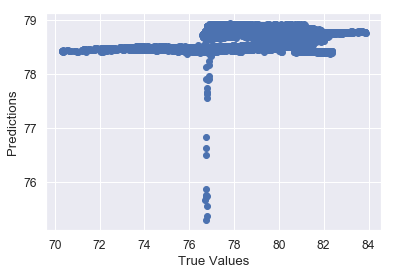

In [35]:
plt.scatter(Y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [36]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
#Performance Calculation
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(Y_test, predictions)
print('Liner Regression MAE: %.4f' % lin_mae) 

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_test, predictions))
print('Liner Regression RMSE: %.4f' % rmse) 

print('Liner Regression MAPE: %.4f' % mean_absolute_percentage_error(Y_test, predictions))




Liner Regression MAE: 1.3325
Liner Regression RMSE: 1.6727
Liner Regression MAPE: 1.6964


In [46]:
from sklearn  import metrics, svm
clf = svm.SVR()
 
clf.fit(X_train, Y_train.values.reshape(-1,))
predictions_svm = clf.predict(X_test)

C:\Users\Imran Jamal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
print("SVR")
predictions_svm[0:5]

SVR


array([78.57940297, 79.99571458, 78.26078067, 77.09808388, 78.24137712])

Text(0, 0.5, 'SVR Predictions')

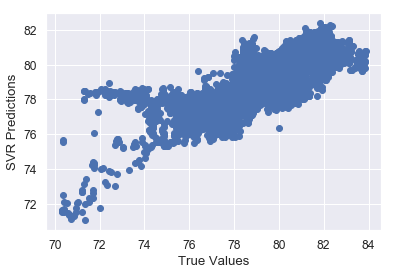

In [48]:
plt.scatter(Y_test, predictions_svm)
plt.xlabel("True Values")
plt.ylabel("SVR Predictions")

In [49]:
#Performance Calculation
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(Y_test, predictions_svm)
print('SVR MAE: %.4f' % lin_mae) 

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_test, predictions_svm))
print('SVR RMSE: %.4f' % rmse) 

print('SVR MAPE: %.4f' % mean_absolute_percentage_error(Y_test, predictions_svm))

SVR MAE: 0.6042
SVR RMSE: 0.9509
SVR MAPE: 2.1365


In [51]:
#SGD Regressor 
from sklearn import linear_model
lmsgd = linear_model.SGDRegressor()
modelsgd = lmsgd.fit(X_train, Y_train.values.reshape(-1,))
predictions_sgd = lmsgd.predict(X_test)

C:\Users\Imran Jamal\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [52]:
predictions_sgd[0:5]

array([-2.71903418e+14, -2.24481773e+14, -2.22349566e+14, -2.71245998e+14,
       -2.35442502e+14])

Text(0, 0.5, 'SGDR Predictions')

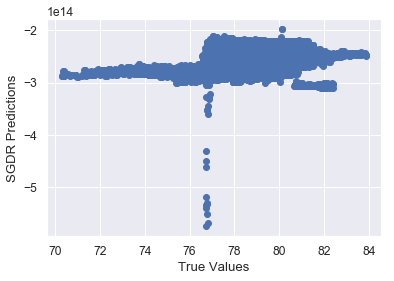

In [53]:
plt.scatter(Y_test, predictions_sgd)
plt.xlabel("True Values")
plt.ylabel("SGDR Predictions")


In [54]:
#Performance Calculation
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(Y_test, predictions_sgd)
print('SGDR MAE: %.4f' % lin_mae) 

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_test, predictions_sgd))
print('SGDR RMSE: %.4f' % rmse) 

print('SGDR MAPE: %.4f' % mean_absolute_percentage_error(Y_test, predictions_sgd))

SGDR MAE: 254283506385767.3750
SGDR RMSE: 255217472832142.0938
SGDR MAPE: 323422153038535.5000


In [55]:
# # LassoLars
lmLassoLars= linear_model.LassoLars()
modeLassoLars= lmLassoLars.fit(X_train, Y_train)
predictions_LassoLars = lmLassoLars.predict(X_test)

In [56]:
predictions_LassoLars[0:5]


array([78.66809711, 78.66809711, 78.66809711, 78.66809711, 78.66809711])

Text(0, 0.5, 'LassoLars Predictions')

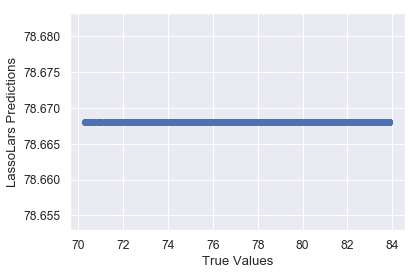

In [57]:
plt.scatter(Y_test, predictions_LassoLars)
plt.xlabel("True Values")
plt.ylabel("LassoLars Predictions")


In [58]:
#Performance Calculation
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(Y_test, predictions_LassoLars)
print('LassoLars Predictions MAE: %.4f' % lin_mae) 

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_test, predictions_LassoLars))
print('LassoLars Predictions RMSE: %.4f' % rmse) 

print('LassoLars Predictions MAPE: %.4f' % mean_absolute_percentage_error(Y_test, predictions_LassoLars))

LassoLars Predictions MAE: 1.3246
LassoLars Predictions RMSE: 1.6803
LassoLars Predictions MAPE: 1.6867


In [60]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train, Y_train.values.reshape(-1,)) 
predicted_rfr = rf.predict(X_test)

In [61]:
predicted_rfr[0:5]


array([73.82668291, 80.32324597, 78.96153735, 76.59064762, 77.75110186])

Text(0, 0.5, 'Random Forest Predictions')

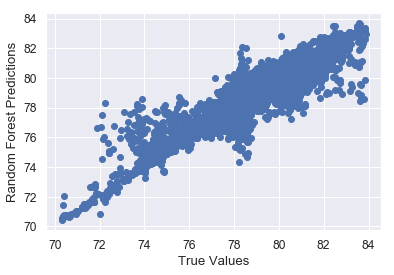

In [62]:
plt.scatter(Y_test, predicted_rfr )
plt.xlabel("True Values")
plt.ylabel("Random Forest Predictions")

In [63]:
#Performance Calculation
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(Y_test, predicted_rfr)
print('Random Forest Predictions MAE: %.4f' % lin_mae) 

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_test, predicted_rfr))
print('Random Forest Predictions RMSE: %.4f' % rmse) 

print('Random Forest Predictions MAPE: %.4f' % mean_absolute_percentage_error(Y_test, predicted_rfr))

Random Forest Predictions MAE: 0.2381
Random Forest Predictions RMSE: 0.4916
Random Forest Predictions MAPE: 2.3176


In [65]:
lmPassiveAggressiveRegressor= linear_model.PassiveAggressiveRegressor()
modePassiveAggressiveRegressor= lmPassiveAggressiveRegressor.fit(X_train, Y_train.values.reshape(-1,))
predictions_PassiveAggressiveRegressor = lmPassiveAggressiveRegressor.predict(X_test)


C:\Users\Imran Jamal\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [66]:
predictions_PassiveAggressiveRegressor[0:5]


array([76.8078158 , 77.04824788, 77.08628217, 76.89857171, 76.98924763])

Text(0, 0.5, 'Passive Aggressive Predictions')

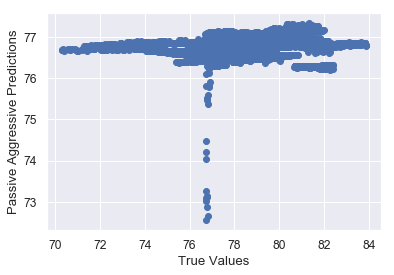

In [67]:
plt.scatter(Y_test, predictions_PassiveAggressiveRegressor)
plt.xlabel("True Values")
plt.ylabel("Passive Aggressive Predictions")


In [68]:
#Performance Calculation
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(Y_test, predictions_PassiveAggressiveRegressor)
print('Passive Aggressive Predictions MAE: %.4f' % lin_mae) 

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_test, predictions_PassiveAggressiveRegressor))
print('Passive Aggressive Predictions RMSE: %.4f' % rmse) 

print('Passive Aggressive Predictions MAPE: %.4f' % mean_absolute_percentage_error(Y_test, predictions_PassiveAggressiveRegressor))

Passive Aggressive Predictions MAE: 1.9837
Passive Aggressive Predictions RMSE: 2.4610
Passive Aggressive Predictions MAPE: 2.5138


In [69]:
lmTheilSenRegressor= linear_model.TheilSenRegressor()
modeTheilSenRegressor= lmTheilSenRegressor.fit(X_train, Y_train)
predictions_TheilSenRegressor = lmTheilSenRegressor.predict(X_test)


C:\Users\Imran Jamal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
predictions_TheilSenRegressor[0:5]


array([79.73926326, 79.07142446, 78.73201821, 78.26540249, 78.89595739])

Text(0, 0.5, 'TheilSen Regressor Predictions')

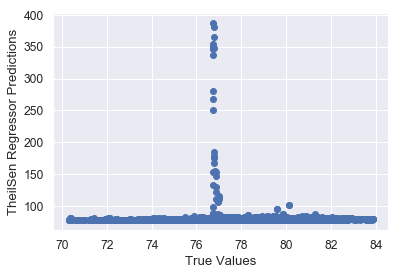

In [71]:
plt.scatter(Y_test, predictions_TheilSenRegressor)
plt.xlabel("True Values")
plt.ylabel("TheilSen Regressor Predictions")


In [72]:
#Performance Calculation
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(Y_test, predictions_TheilSenRegressor)
print('TheilSen Regressor Predictions MAE: %.4f' % lin_mae) 

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_test, predictions_TheilSenRegressor))
print('TheilSen Regressor Predictions RMSE: %.4f' % rmse) 

print('TheilSen Regressor Predictions MAPE: %.4f' % mean_absolute_percentage_error(Y_test, predictions_PassiveAggressiveRegressor))

TheilSen Regressor Predictions MAE: 1.6891
TheilSen Regressor Predictions RMSE: 7.0262
TheilSen Regressor Predictions MAPE: 2.5138
